In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import pickle

In [17]:
df=pd.read_csv("glass.csv")

In [18]:
scaler=StandardScaler()

In [19]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler()

In [20]:
scaled_features=scaler.transform(df.drop('Type',axis=1))

In [21]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [22]:
X_train,x_test,y_train,y_test=train_test_split(scaled_features,df['Type'],test_size=0.30,random_state=42)

In [23]:
accuracy_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Type'],cv=9)
    accuracy_rate.append(score.mean())

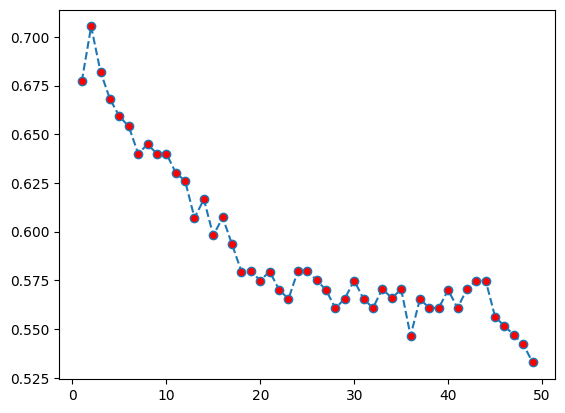

In [24]:
plt.plot(range(1,50),accuracy_rate,linestyle='dashed',marker='o',markerfacecolor='red')

In [25]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [26]:
pred=knn.predict(x_test)

In [27]:
score=accuracy_score(pred,y_test)
score

0.6461538461538462

In [28]:
pickle.dump(knn,open('model.pkl','wb'))

In [29]:
model=pickle.load(open('model.pkl','rb'))